## **Titanic - Machine Learning from Disaster**

Description :https://www.encyclopedia-titanica.org/ 

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Load Data

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.shape

(418, 11)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = pd.concat([df_train, df_test])
df.shape

(1309, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.Survived.unique()

array([ 0.,  1., nan])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


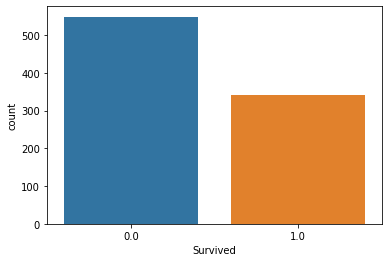

In [ ]:
sns.countplot(df.Survived)

# Baseline model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# doplniť hodnotenie + test split


# EDA

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.0 MB 129 kB/s
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 35.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 9.9 MB 50.4 MB/s 
     |████████████████████████████████| 4.7 MB 40.7 MB/s 
     |████████████████████████████████| 296 kB 60.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=8b58a96eca23625b118c678b9248229a965b0f4ba88489ebdd22e6018484c4b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-jn5y7nyw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9d25ab9c4a27a2ab4b07dbb4d24697d0a00482779c94edf6e612eeaba9437305
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report')

In [ ]:
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 165.2+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [ ]:
# Keep PassengerId from final predictions (submition) 
Id = df.PassengerId

# drop for high cardinality (train)
df = df.drop("PassengerId", axis=1)

# Sex

In [ ]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
pd.get_dummies(df.Sex)


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


# Cabin

In [ ]:
df = df.drop("Cabin", axis=1)
df.shape

(1309, 10)

# Embarked

In [ ]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# Inpute based on the documentation
df.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

# Age

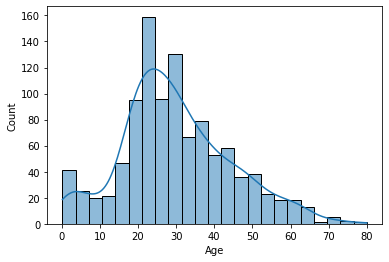

In [ ]:
sns.histplot(df.Age, kde=True)

In [ ]:
df.Age.isnull().sum()

263

In [ ]:
# replacing missing Age values by Age mean - not a good idea
# df.Age = df["Age"].fillna(df.Age.mean())

In [ ]:
# select data for Age is null (nan)
df_age_isnull = df[df.Age.isnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


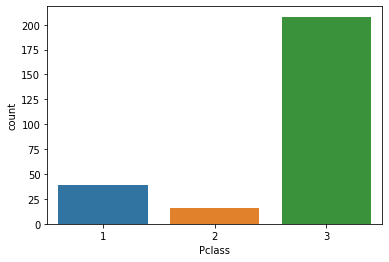

In [ ]:
# Pclass distribution for passangers with mising Age value
sns.countplot(df_age_isnull.Pclass)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


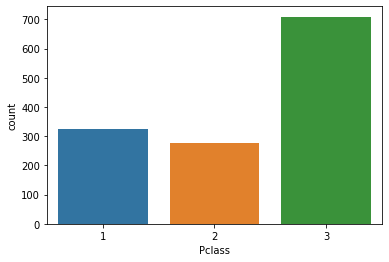

In [ ]:
# Pclass distribution for all passangers 
sns.countplot(df.Pclass)

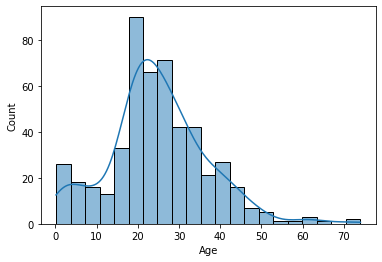

In [ ]:
# Age distribution for passangers in 3rd class
sns.histplot(df[df.Pclass==3].Age, kde=True)


In [ ]:
print("Average age for passengers in 3rd class:", df[df.Pclass==3]["Age"].mean())

Average age for passengers in 3rd class: 24.81636726546906


In [ ]:
# inpute Age (for null)
mean_3rd = df[df.Pclass==3]["Age"].mean()
std_3rd = df[df.Pclass==3]["Age"].std()
is_null = df["Age"].isnull().sum()
rand_age = np.random.randint(mean_3rd - std_3rd, mean_3rd + std_3rd, size = is_null)
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)


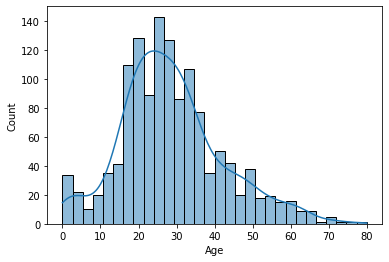

In [ ]:
# inpute Age for null 
sns.histplot(df.Age, kde=True)


In [ ]:
# TODO: try to divide into bins
# add flag is baby Age < X

# Name

In [ ]:
# TODO - tryto extract titles

In [ ]:
# otherwise drop (high cardinality)
df = df.drop("Name", axis=1)
df.shape

(1309, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 134.6+ KB


# Ticket

In [ ]:
df.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [ ]:
# TODO: trz to explore ticket (string part) for possible location on the boat

In [ ]:
# otherwise drop
df = df.drop("Ticket", axis=1)
df.shape

(1309, 8)

# Family

In [ ]:
# sns.barplot(x="SibSp", y="Survived", data=df)

In [ ]:
# sns.barplot(x="Parch", y="Survived", data=df)

In [ ]:
df["FamilySize"] = df.SibSp + df.Parch

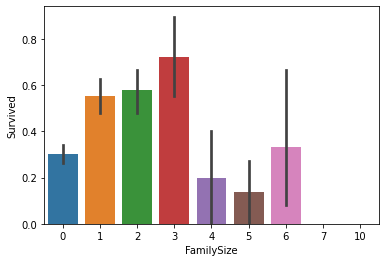

In [ ]:
sns.barplot(x="FamilySize", y="Survived", data=df)

In [ ]:
df["isAlone"] = 1
df["isAlone"].loc[df["FamilySize"] > 0] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


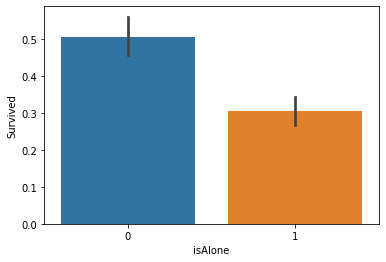

In [ ]:
sns.barplot(x="isAlone", y="Survived", data=df)

In [ ]:
df = df.drop(["Parch", "SibSp"], axis=1)
df.shape

(1309, 8)

# Fare

In [ ]:
df.Fare.describe()


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [ ]:
# Log - transfomation
df.Fare.apply(lambda x: np.log(x+1))

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: Fare, Length: 1309, dtype: float64

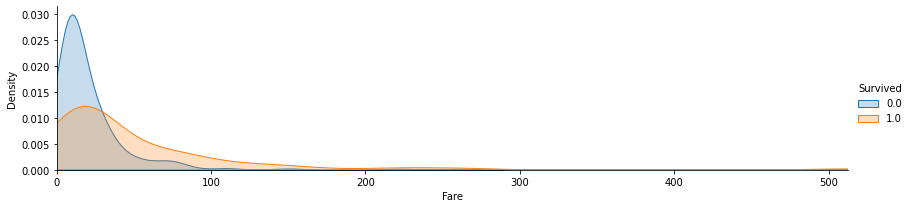

In [ ]:
f = sns.FacetGrid(df, hue = "Survived", aspect=4)
f.map(sns.kdeplot, "Fare", shade=True)
f.set(xlim=(0,df["Fare"].max()))
f.add_legend()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df.Fare = ss.fit_transform(df.Fare.values.reshape(-1, 1))

In [ ]:
# TODO: Try normalization (min-max scaler) instead of standartization (z-score normalization)

# Categorical encoding

Feature Engineering

In [ ]:
df = pd.get_dummies(df)
df.shape

(1309, 11)

In [ ]:
df.head()


,Survived,Pclass,Age,Fare,FamilySize,isAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22,-0.503402,1,0,0,1,0,0,1
1,1.0,1,38,0.734222,1,0,1,0,1,0,0
2,1.0,3,26,-0.490356,0,1,1,0,0,0,1
3,1.0,1,35,0.382778,1,0,1,0,0,0,1
4,0.0,3,35,-0.487940,0,1,0,1,0,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   int64  
 3   Fare        1308 non-null   float64
 4   FamilySize  1309 non-null   int64  
 5   isAlone     1309 non-null   int64  
 6   Sex_female  1309 non-null   uint8  
 7   Sex_male    1309 non-null   uint8  
 8   Embarked_C  1309 non-null   uint8  
 9   Embarked_Q  1309 non-null   uint8  
 10  Embarked_S  1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 110.3 KB


# Correlation matrix

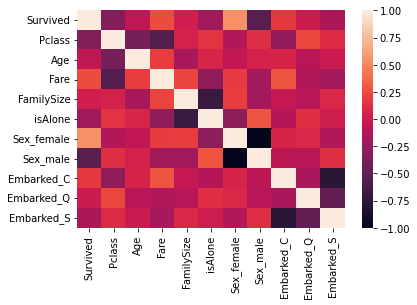

In [ ]:
sns.heatmap(df.corr())

# Model










In [67]:
df_train = df[df.Survived.notnull()]
df_train.shape

(891, 11)

In [68]:
# Submition
df_test = df[df.Survived.isnull()]
df_test.shape

(418, 11)

In [69]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [74]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [75]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_ss, y_train)
predictions = model.predict(X_test_ss)
predictions_proba = model.predict_proba(X_test_ss)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       175
         1.0       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [79]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score


models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(), 
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

In [80]:
model_jmeno = []
f1_score_list = []

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#Train and score algorithms
for m in models:
    model_name = type(m).__name__
    m.fit(X_train_ss, y_train)
    pred = m.predict(X_test_ss)
    auc = roc_auc_score(y_test, pred) 
    model_jmeno.append(model_name)
    f1skore = f1_score(y_test, pred)
    f1_score_list.append(f1skore)
    print(m.__class__.__name__)
    print("-----------------------")
    print(classification_report(y_test, pred))
    print('AUC-ROC score: ', auc)

LogisticRegression
-----------------------
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       175
         1.0       0.81      0.69      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

AUC-ROC score:  0.791547619047619
RandomForestClassifier
-----------------------
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       175
         1.0       0.75      0.69      0.72       120

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295

AUC-ROC score:  0.7658333333333334
SVC
-----------------------
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86       175
         1.0       0.88      0.64      0.74       

In [82]:
df_modely = pd.DataFrame({'model':model_jmeno, 'f1_score':f1_score_list})

In [83]:
df_modely

,model,f1_score
0,LogisticRegression,0.747748
1,RandomForestClassifier,0.718615
2,SVC,0.740385
3,KNeighborsClassifier,0.740088
4,AdaBoostClassifier,0.727273
5,GradientBoostingClassifier,0.704762
6,XGBClassifier,0.757991
